# Première partie du projet 4 : Anticipez les besoins en consommation de bâtiments

Bienvenue dans ce Jupyter Notebook dédié à la première partie du projet numéro 4 du parcours Data Scientist proposé par la plateforme de formation en ligne OpenClassrooms.

Dans ce notebook, je vais vous présenter l'analyse exploratoire des données que j'ai réalisée. Cette étape est essentielle pour comprendre le jeu de données et poser les bases du développement des algorithmes de prédiction qui seront élaborés dans les étapes suivantes du projet.

Nous commencerons par importer le jeu de données concerné afin d'examiner sa structure et d'obtenir un premier aperçu de ses principales caractéristiques.

## Première analyse exploratoire et premier feature engineering

In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Projet 4 : Anticiper les besoins en consommation pour les bâtiments/2016_Building_Energy_Benchmarking.csv')
display(df.head())
print(df.columns)
print(df.info())
df.describe()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),Comments,TotalGHGEmissions,GHGEmissionsIntensity
count,3376.000000,3376.0,3360.000000,3376.000000,3376.000000,3376.000000,3376.000000,3368.000000,3376.000000,3.376000e+03,...,3.371000e+03,3.370000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,0.0,3367.000000,3367.000000
mean,21208.991114,2016.0,98116.949107,4.439277,47.624033,-122.334795,1968.573164,1.106888,4.709123,9.483354e+04,...,5.403667e+06,5.276726e+06,2.745959e+05,1.086639e+06,3.707612e+06,1.368505e+04,1.368505e+06,NaN,119.723971,1.175916
std,12223.757015,0.0,18.615205,2.120625,0.047758,0.027203,33.088156,2.108402,5.494465,2.188376e+05,...,2.161063e+07,1.593879e+07,3.912173e+06,4.352478e+06,1.485066e+07,6.709781e+04,6.709781e+06,NaN,538.832227,1.821452
min,1.000000,2016.0,98006.000000,1.000000,47.499170,-122.414250,1900.000000,0.000000,0.000000,1.128500e+04,...,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,NaN,-0.800000,-0.020000
25%,19990.750000,2016.0,98105.000000,3.000000,47.599860,-122.350662,1948.000000,1.000000,2.000000,2.848700e+04,...,9.251286e+05,9.701822e+05,0.000000e+00,1.874229e+05,6.394870e+05,0.000000e+00,0.000000e+00,NaN,9.495000,0.210000
50%,23112.000000,2016.0,98115.000000,4.000000,47.618675,-122.332495,1975.000000,1.000000,4.000000,4.417500e+04,...,1.803753e+06,1.904452e+06,0.000000e+00,3.451299e+05,1.177583e+06,3.237538e+03,3.237540e+05,NaN,33.920000,0.610000
75%,25994.250000,2016.0,98122.000000,7.000000,47.657115,-122.319407,1997.000000,1.000000,5.000000,9.099200e+04,...,4.222455e+06,4.381429e+06,0.000000e+00,8.293178e+05,2.829632e+06,1.189033e+04,1.189034e+06,NaN,93.940000,1.370000
max,50226.000000,2016.0,98272.000000,7.000000,47.733870,-122.220966,2015.000000,111.000000,99.000000,9.320156e+06,...,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,NaN,16870.980000,34.090000


Il y a **3376** lignes ainsi que **46** colonnes au sein de notre dataset.

Une valeur extrême pourrait fausser notre algorithme : University of Washington - Seattle Campus, nous allons donc l'enlever de notre dataframe.

Ensuite, nous procéderons à un premier filtrage de donné, basé sur les instructions données par notre manager :

Utiliser les données des bâtiments qui ne sont pas destinés à l'habitation,

Enlever les lignes dont les valeurs au sein de la colonne 'Outlier' sont 'High outlier' ou 'Low outlier,

Enlever les lignes dont les valeurs au sein de la colonne 'ComplianceStatus' ne sont pas égales à 'Compliant'

In [ ]:
#Montre le nombre de valeurs uniques au sein de la colonne 'BuildingType'
df['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

Nous allons donc uniquement garder les lignes dont les valeurs au sein de la colonne 'BuildingType' sont 'NonResidential', 'Nonresidential COS', 'SPS-District K-12', 'Campus' ou 'Nonresidential WA'.

In [ ]:
#Montre et compte le nombre de valeurs uniques au sein de la colonne 'Outlier'
print(df['Outlier'].unique())
print(df['Outlier'].value_counts())

[nan 'High outlier' 'Low outlier']
Outlier
Low outlier     23
High outlier     9
Name: count, dtype: int64


In [ ]:
#Montre et compte le nombre de valeurs uniques au sein de la colonne 'ComplanceStatus'
df['ComplianceStatus'].value_counts()

,count
ComplianceStatus,
Compliant,3211
Error - Correct Default Data,113
Non-Compliant,37
Missing Data,15


Enfin, nous allons créer un histogramme montrant le nombre de valeurs nulles au sein de chaque colonne de notre dataframe :    

<Axes: >

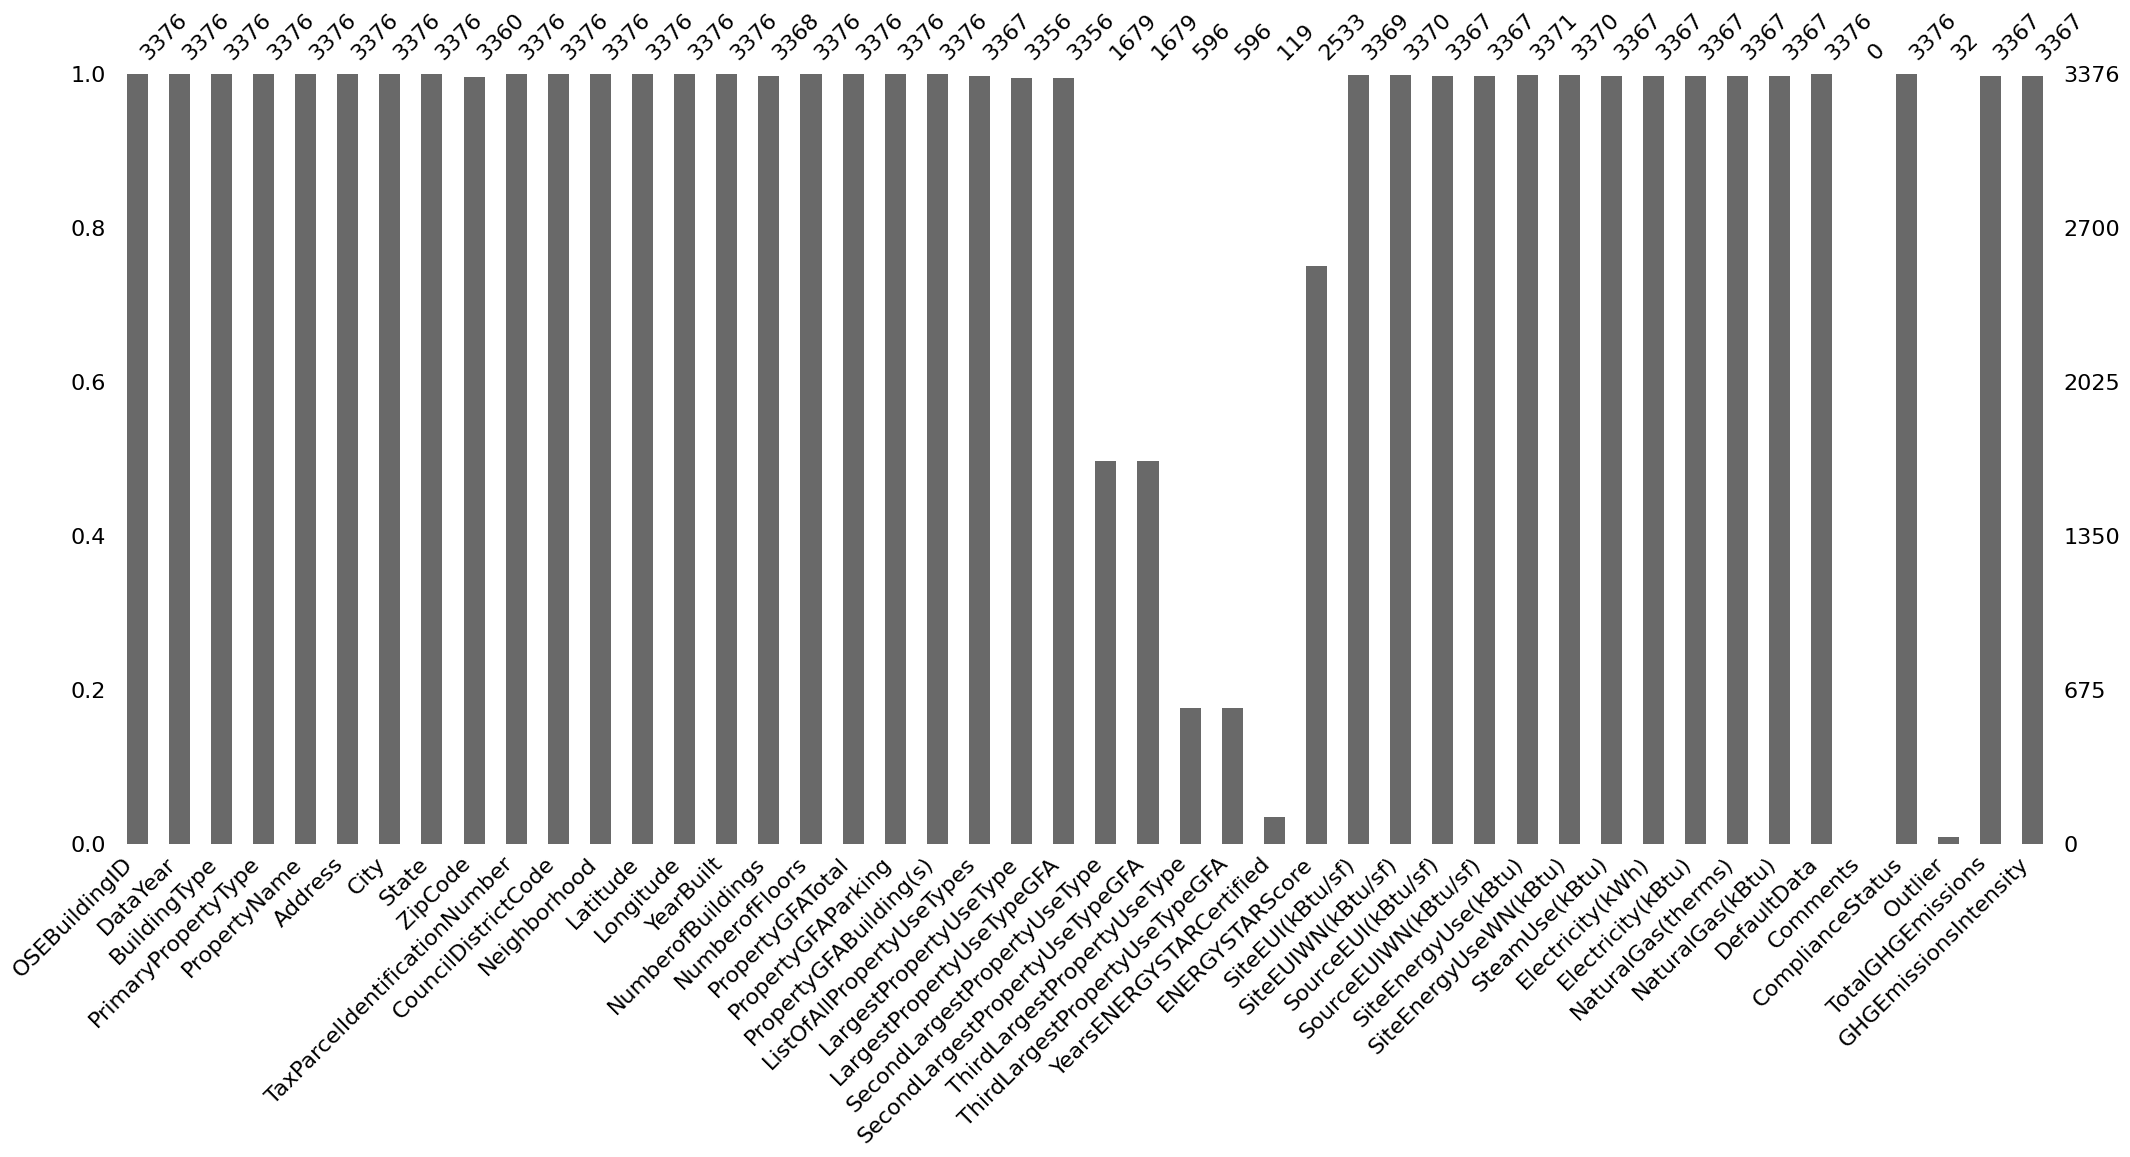

In [ ]:
import missingno as msno
msno.bar(df)

Les colonnes SecondLargestPropertyUseType et ThirdLargestPropertyUseType contiennent de nombreuses valeurs nulles. Pour éviter de perdre des informations, nous allons remplacer ces valeurs par la catégorie 'Non renseigné'. Cela permettra aux algorithmes de prendre en compte l'absence d'information sans introduire de biais.

Les colonnes SecondLargestPropertyUseTypeGFA et ThirdLargestPropertyUseTypeGFA contiennent également de nombreuses valeurs nulles. Nous allons les conserver en tant que valeurs nulles, car certains algorithmes modernes peuvent gérer ces cas efficacement. Si nécessaire, une imputation pourra être envisagée ultérieurement.

Enfin, les colonnes LargestPropertyUseType et LargestPropertyUseTypeGFA sont essentielles à notre analyse. Par conséquent, nous allons supprimer les 4 lignes où ces colonnes contiennent des valeurs nulles afin de garantir la qualité des données.

In [ ]:
df = df.dropna(subset=['LargestPropertyUseType'])

df['SecondLargestPropertyUseType'] = df['SecondLargestPropertyUseType'].fillna('Non renseigné')
df['ThirdLargestPropertyUseType'] = df['ThirdLargestPropertyUseType'].fillna('Non renseigné')
df['SecondLargestPropertyUseTypeGFA'] = df['SecondLargestPropertyUseTypeGFA'].fillna(0)
df['ThirdLargestPropertyUseTypeGFA'] = df['ThirdLargestPropertyUseTypeGFA'].fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3356 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3356 non-null   int64  
 1   DataYear                         3356 non-null   int64  
 2   BuildingType                     3356 non-null   object 
 3   PrimaryPropertyType              3356 non-null   object 
 4   PropertyName                     3356 non-null   object 
 5   Address                          3356 non-null   object 
 6   City                             3356 non-null   object 
 7   State                            3356 non-null   object 
 8   ZipCode                          3340 non-null   float64
 9   TaxParcelIdentificationNumber    3356 non-null   object 
 10  CouncilDistrictCode              3356 non-null   int64  
 11  Neighborhood                     3356 non-null   object 
 12  Latitude                 

<ipython-input-31-5bcc0c2d1d48>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SecondLargestPropertyUseType'] = df['SecondLargestPropertyUseType'].fillna('Non renseigné')
<ipython-input-31-5bcc0c2d1d48>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ThirdLargestPropertyUseType'] = df['ThirdLargestPropertyUseType'].fillna('Non renseigné')
<ipython-input-31-5bcc0c2d1d48>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

Une nouvelle colonne intitulée BuildingAge est créée pour calculer l'âge des bâtiments en soustrayant la valeur de la colonne YearBuilt (année de construction) de celle de DataYear (année des données).

Les colonnes YearBuilt et DataYear sont ensuite supprimées du DataFrame car elles ne sont plus nécessaires après ce calcul.


Ensuite, pour garantir l'uniformité des données, toutes les valeurs de la colonne Neighborhood sont converties en majuscules à l'aide de la méthode str.upper().

Un aperçu des valeurs uniques de cette colonne est affiché à l'aide de la fonction unique(), afin de vérifier les changements.

Enfin, un résumé des informations sur le DataFrame est affiché avec la méthode info() pour valider la structure des données après ces transformations.


In [ ]:
#Création de la colonne "BuildingAge"
df['BuildingAge'] = df['DataYear'] - df['YearBuilt']
print(df[['BuildingAge','DataYear','YearBuilt']])
df.drop(['YearBuilt','DataYear'], axis=1, inplace=True)

#Régularisation des valeurs au sein de la colonne "Neighborhood"
df['Neighborhood']=df['Neighborhood'].str.upper()
display(df['Neighborhood'].unique())
df.info()

      BuildingAge  DataYear  YearBuilt
0              89      2016       1927
1              20      2016       1996
2              47      2016       1969
3              90      2016       1926
4              36      2016       1980
...           ...       ...        ...
3371           26      2016       1990
3372           12      2016       2004
3373           42      2016       1974
3374           27      2016       1989
3375           78      2016       1938

[3356 rows x 3 columns]


<ipython-input-32-6bff10322d19>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BuildingAge'] = df['DataYear'] - df['YearBuilt']
<ipython-input-32-6bff10322d19>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['YearBuilt','DataYear'], axis=1, inplace=True)
<ipython-input-32-6bff10322d19>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

array(['DOWNTOWN', 'SOUTHEAST', 'NORTHEAST', 'EAST', 'CENTRAL', 'NORTH',
       'MAGNOLIA / QUEEN ANNE', 'LAKE UNION', 'GREATER DUWAMISH',
       'BALLARD', 'NORTHWEST', 'SOUTHWEST', 'DELRIDGE',
       'DELRIDGE NEIGHBORHOODS'], dtype=object)

<class 'pandas.core.frame.DataFrame'>
Index: 3356 entries, 0 to 3375
Data columns (total 45 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3356 non-null   int64  
 1   BuildingType                     3356 non-null   object 
 2   PrimaryPropertyType              3356 non-null   object 
 3   PropertyName                     3356 non-null   object 
 4   Address                          3356 non-null   object 
 5   City                             3356 non-null   object 
 6   State                            3356 non-null   object 
 7   ZipCode                          3340 non-null   float64
 8   TaxParcelIdentificationNumber    3356 non-null   object 
 9   CouncilDistrictCode              3356 non-null   int64  
 10  Neighborhood                     3356 non-null   object 
 11  Latitude                         3356 non-null   float64
 12  Longitude                

En rassemblant toutes nos analyses précédentes, voici le premier bloc de code qui permet de filtrer notre dataframe selon les critères demandés.

In [ ]:
df_non_residential = df[df['BuildingType'].isin(['NonResidential', 'Nonresidential COS', 'SPS-District K-12', 'Campus', 'Nonresidential WA'])]

df_final=df_non_residential[df_non_residential['ComplianceStatus']=='Compliant']

df_final = df_final[~df_final['Outlier'].isin(['Low outlier','High outlier '])]

df_final=df_final.drop(['OSEBuildingID','CouncilDistrictCode','City','State',
                        'TaxParcelIdentificationNumber','DefaultData','ComplianceStatus',
       'Latitude', 'Longitude','Comments','YearsENERGYSTARCertified','Outlier','Address','ListOfAllPropertyUseTypes'],axis=1)

df_non_residential.info()

df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1662 entries, 0 to 3375
Data columns (total 45 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    1662 non-null   int64  
 1   BuildingType                     1662 non-null   object 
 2   PrimaryPropertyType              1662 non-null   object 
 3   PropertyName                     1662 non-null   object 
 4   Address                          1662 non-null   object 
 5   City                             1662 non-null   object 
 6   State                            1662 non-null   object 
 7   ZipCode                          1646 non-null   float64
 8   TaxParcelIdentificationNumber    1662 non-null   object 
 9   CouncilDistrictCode              1662 non-null   int64  
 10  Neighborhood                     1662 non-null   object 
 11  Latitude                         1662 non-null   float64
 12  Longitude                

Il ne nous reste plus pour l'instant que **31** colonnes ainsi que **1544** lignes au sein de notre dataframe.

## Deuxième analyse exploratoire plus approfondie

Maintenant que nous avons effectué un premier traitement sur notre jeu de données, nous allons examiner en détail la répartition des valeurs pour chaque colonne. Cette étape nous permettra de mieux comprendre la composition des données et d'identifier les éventuelles tendances ou anomalies.

Par la suite, nous analyserons également les corrélations entre les différentes colonnes afin de déterminer les relations potentielles entre les variables, ce qui pourra guider la création de nos modèles prédictifs.

Enfin, nous allons examiner la distribution de chacune des variables de notre jeu de données à l’aide de boxplots. Cette visualisation nous permettra d’identifier les valeurs aberrantes et d’évaluer si celles-ci reflètent des cas exceptionnels ou s’il s’agit d’erreurs dans les données.

### Analyse des corrélations entre les variables numériques

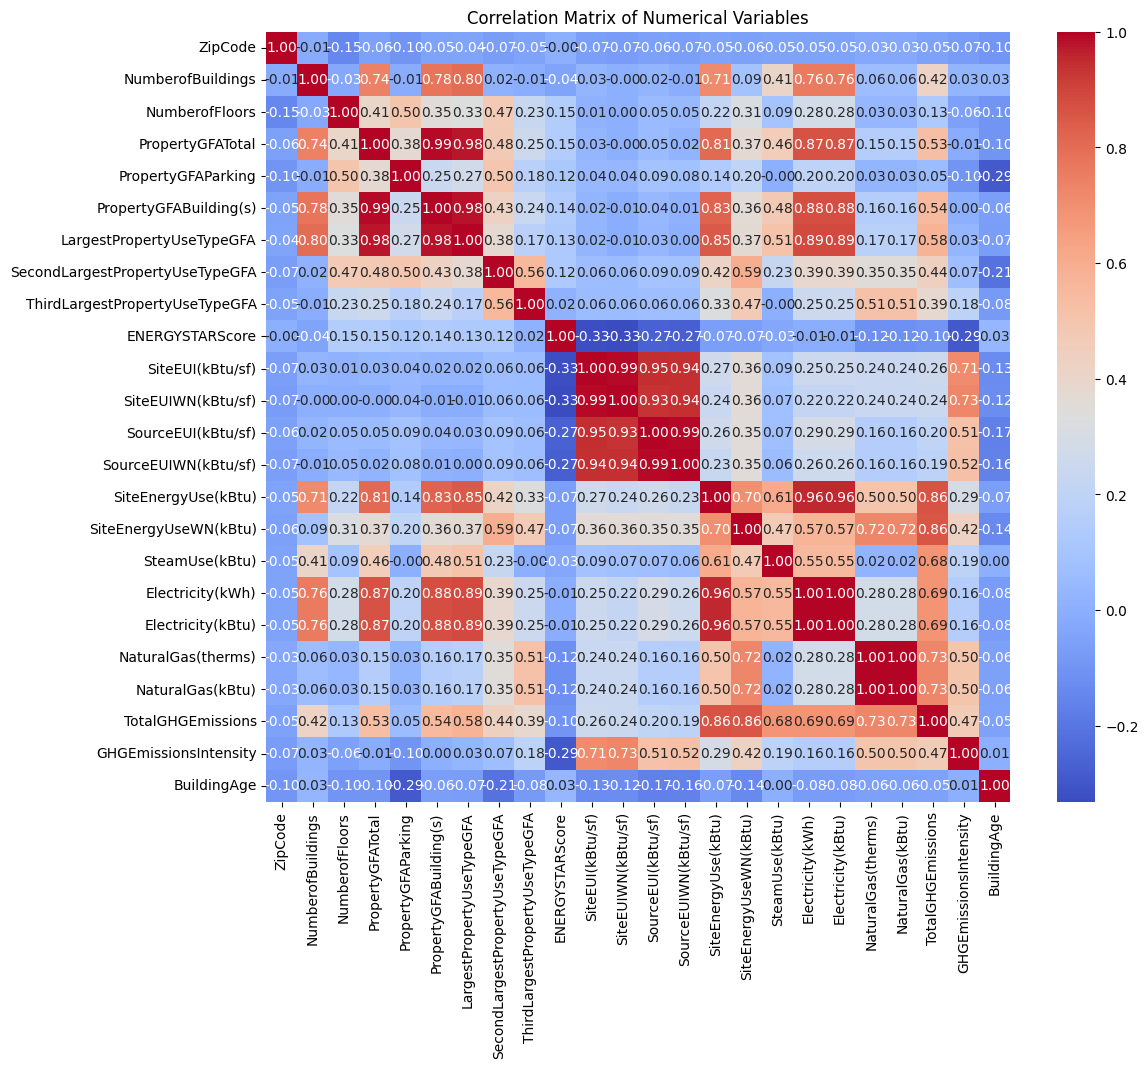

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sélectionne les colonnes numériques
numerical_cols = df_final.select_dtypes(include=['number']).columns

# Calcule la matrice de corrélation
correlation_matrix = df_final[numerical_cols].corr()

# Montre la heatmap correspondante
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

explorons les acronymes présents dans les colonnes pour mieux comprendre leur signification :

GHG : Greenhouse Gas Emissions (émissions de gaz à effet de serre).

OSE : Seattle Office of Sustainability and Environment.

EUI : Energy Use Intensity (intensité d'utilisation énergétique). kBtu : Kilo-British Thermal Unit (1 kWh = 3,412 kBtu).

sf : Square Feet (pieds carrés, 1 m² = 10,7639 sf).

WN : Weather-Normalized (normalisé en fonction des conditions climatiques).

GFA : Gross Floor Area (surface de plancher brute), soit la surface totale couverte par un toit, même en l'absence de murs.

therm : unité énergétique où 1 therm = 100 000 Btu.

Les valeurs fournies pour l'électricité, telles que Electricity(kWh) et Electricity(kBtu), sont extrêmement corrélés, tout comme les colonnes NaturalGas(kBtu) et NaturalGas(therms). Nous pouvons donc garder seulement les colonnes dont les valeurs sont en unité kBtu.

Enfin, les colonnes SourceEUI(kBtu/sf)  et SiteEUI(kBtu/sf)  sont corrélées à 95%, nous pouvons donc supprimer la colonne SiteEUI(kBtu/sf)  pour ne pas fausser les résultats de notre futur algorithme.

L'émission de gaz à effet de serre est liée de façon directe à la consommation d'énergie, les données normalisée en fonction des conditions climatiques ne nous intéresserons donc pas dans l'analyse. Nous pouvons donc également supprimées les colonnes avec le suffixe WN de notre dataframe.

In [ ]:
df_final_2=df_final.copy()
df_final_2.drop(['Electricity(kWh)', 'NaturalGas(therms)','SiteEUIWN(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUseWN(kBtu)','SiteEUI(kBtu/sf)'], axis=1, inplace=True)
print(df_final_2.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1544 entries, 0 to 3375
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   BuildingType                     1544 non-null   object 
 1   PrimaryPropertyType              1544 non-null   object 
 2   PropertyName                     1544 non-null   object 
 3   ZipCode                          1531 non-null   float64
 4   Neighborhood                     1544 non-null   object 
 5   NumberofBuildings                1544 non-null   float64
 6   NumberofFloors                   1544 non-null   int64  
 7   PropertyGFATotal                 1544 non-null   int64  
 8   PropertyGFAParking               1544 non-null   int64  
 9   PropertyGFABuilding(s)           1544 non-null   int64  
 10  LargestPropertyUseType           1544 non-null   object 
 11  LargestPropertyUseTypeGFA        1544 non-null   float64
 12  SecondLargestPropertyUseT

Enfin, nous allons enlever de notre jeu de données les colonnes "PropertyGFABuilding" et "LargestPropertyUseTypeGFA", étant coorélées à plus de 90% avec la variable "PropertyGFATotal".

In [ ]:
df_final_2.drop(["PropertyGFABuilding(s)","LargestPropertyUseTypeGFA"], axis=1, inplace=True)
df_final_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1544 entries, 0 to 3375
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   BuildingType                     1544 non-null   object 
 1   PrimaryPropertyType              1544 non-null   object 
 2   PropertyName                     1544 non-null   object 
 3   ZipCode                          1531 non-null   float64
 4   Neighborhood                     1544 non-null   object 
 5   NumberofBuildings                1544 non-null   float64
 6   NumberofFloors                   1544 non-null   int64  
 7   PropertyGFATotal                 1544 non-null   int64  
 8   PropertyGFAParking               1544 non-null   int64  
 9   LargestPropertyUseType           1544 non-null   object 
 10  SecondLargestPropertyUseType     1544 non-null   object 
 11  SecondLargestPropertyUseTypeGFA  1544 non-null   float64
 12  ThirdLargestPropertyUseTy

Nous n'avons plus de données fortement corrélées, exceptées celles que nous voulons prédire. Nous allons maintenant analyser la distribution des données au sein de chacune de nos variables numériques.

### Analyse de la distribution des données

Examinons maintenant la distribution de chacune des variables de notre jeu de données à l’aide de boxplots. Cette visualisation nous permettra d’identifier les valeurs aberrantes et d’évaluer si celles-ci reflètent des cas exceptionnels ou s’il s’agit d’erreurs dans les données.

In [41]:
df_final_2.describe()

,ZipCode,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,BuildingAge
count,1531.000000,1544.000000,1544.000000,1.544000e+03,1544.000000,1544.000000,1544.000000,995.000000,1544.000000,1.544000e+03,1.544000e+03,1.544000e+03,1.544000e+03,1544.000000,1544.000000,1544.000000
mean,98116.797518,1.178756,4.276554,1.214843e+05,13878.198187,19818.901099,3380.578626,63.625126,183.340285,8.874811e+06,5.526110e+05,6.150847e+06,2.041279e+06,193.947241,1.669385,54.310881
std,18.711837,3.043076,6.788486,3.066726e+05,43772.768606,52416.800715,18649.077742,28.833198,188.168020,3.134476e+07,5.725841e+06,2.153760e+07,9.722919e+06,780.080395,2.410282,32.856320
min,98006.000000,0.000000,0.000000,1.128500e+04,0.000000,0.000000,0.000000,1.000000,0.000000,5.713320e+04,0.000000e+00,-1.154170e+05,0.000000e+00,-0.800000,-0.020000,1.000000
25%,98104.000000,1.000000,1.000000,2.884325e+04,0.000000,0.000000,0.000000,44.000000,81.199997,1.251083e+06,0.000000e+00,7.308642e+05,0.000000e+00,20.595000,0.360000,27.000000
50%,98109.000000,1.000000,2.000000,4.812550e+04,0.000000,0.000000,0.000000,71.000000,138.650002,2.727768e+06,0.000000e+00,1.741474e+06,4.881350e+05,49.940000,0.880000,50.000000
75%,98125.000000,1.000000,4.000000,1.076615e+05,0.000000,13677.500000,0.000000,88.000000,213.549995,7.313082e+06,0.000000e+00,5.267052e+06,1.530812e+06,147.227500,1.965000,86.000000
max,98199.000000,111.000000,99.000000,9.320156e+06,512608.000000,639931.000000,459748.000000,100.000000,2620.000000,8.739237e+08,1.349435e+08,6.570744e+08,2.979090e+08,16870.980000,34.090000,116.000000


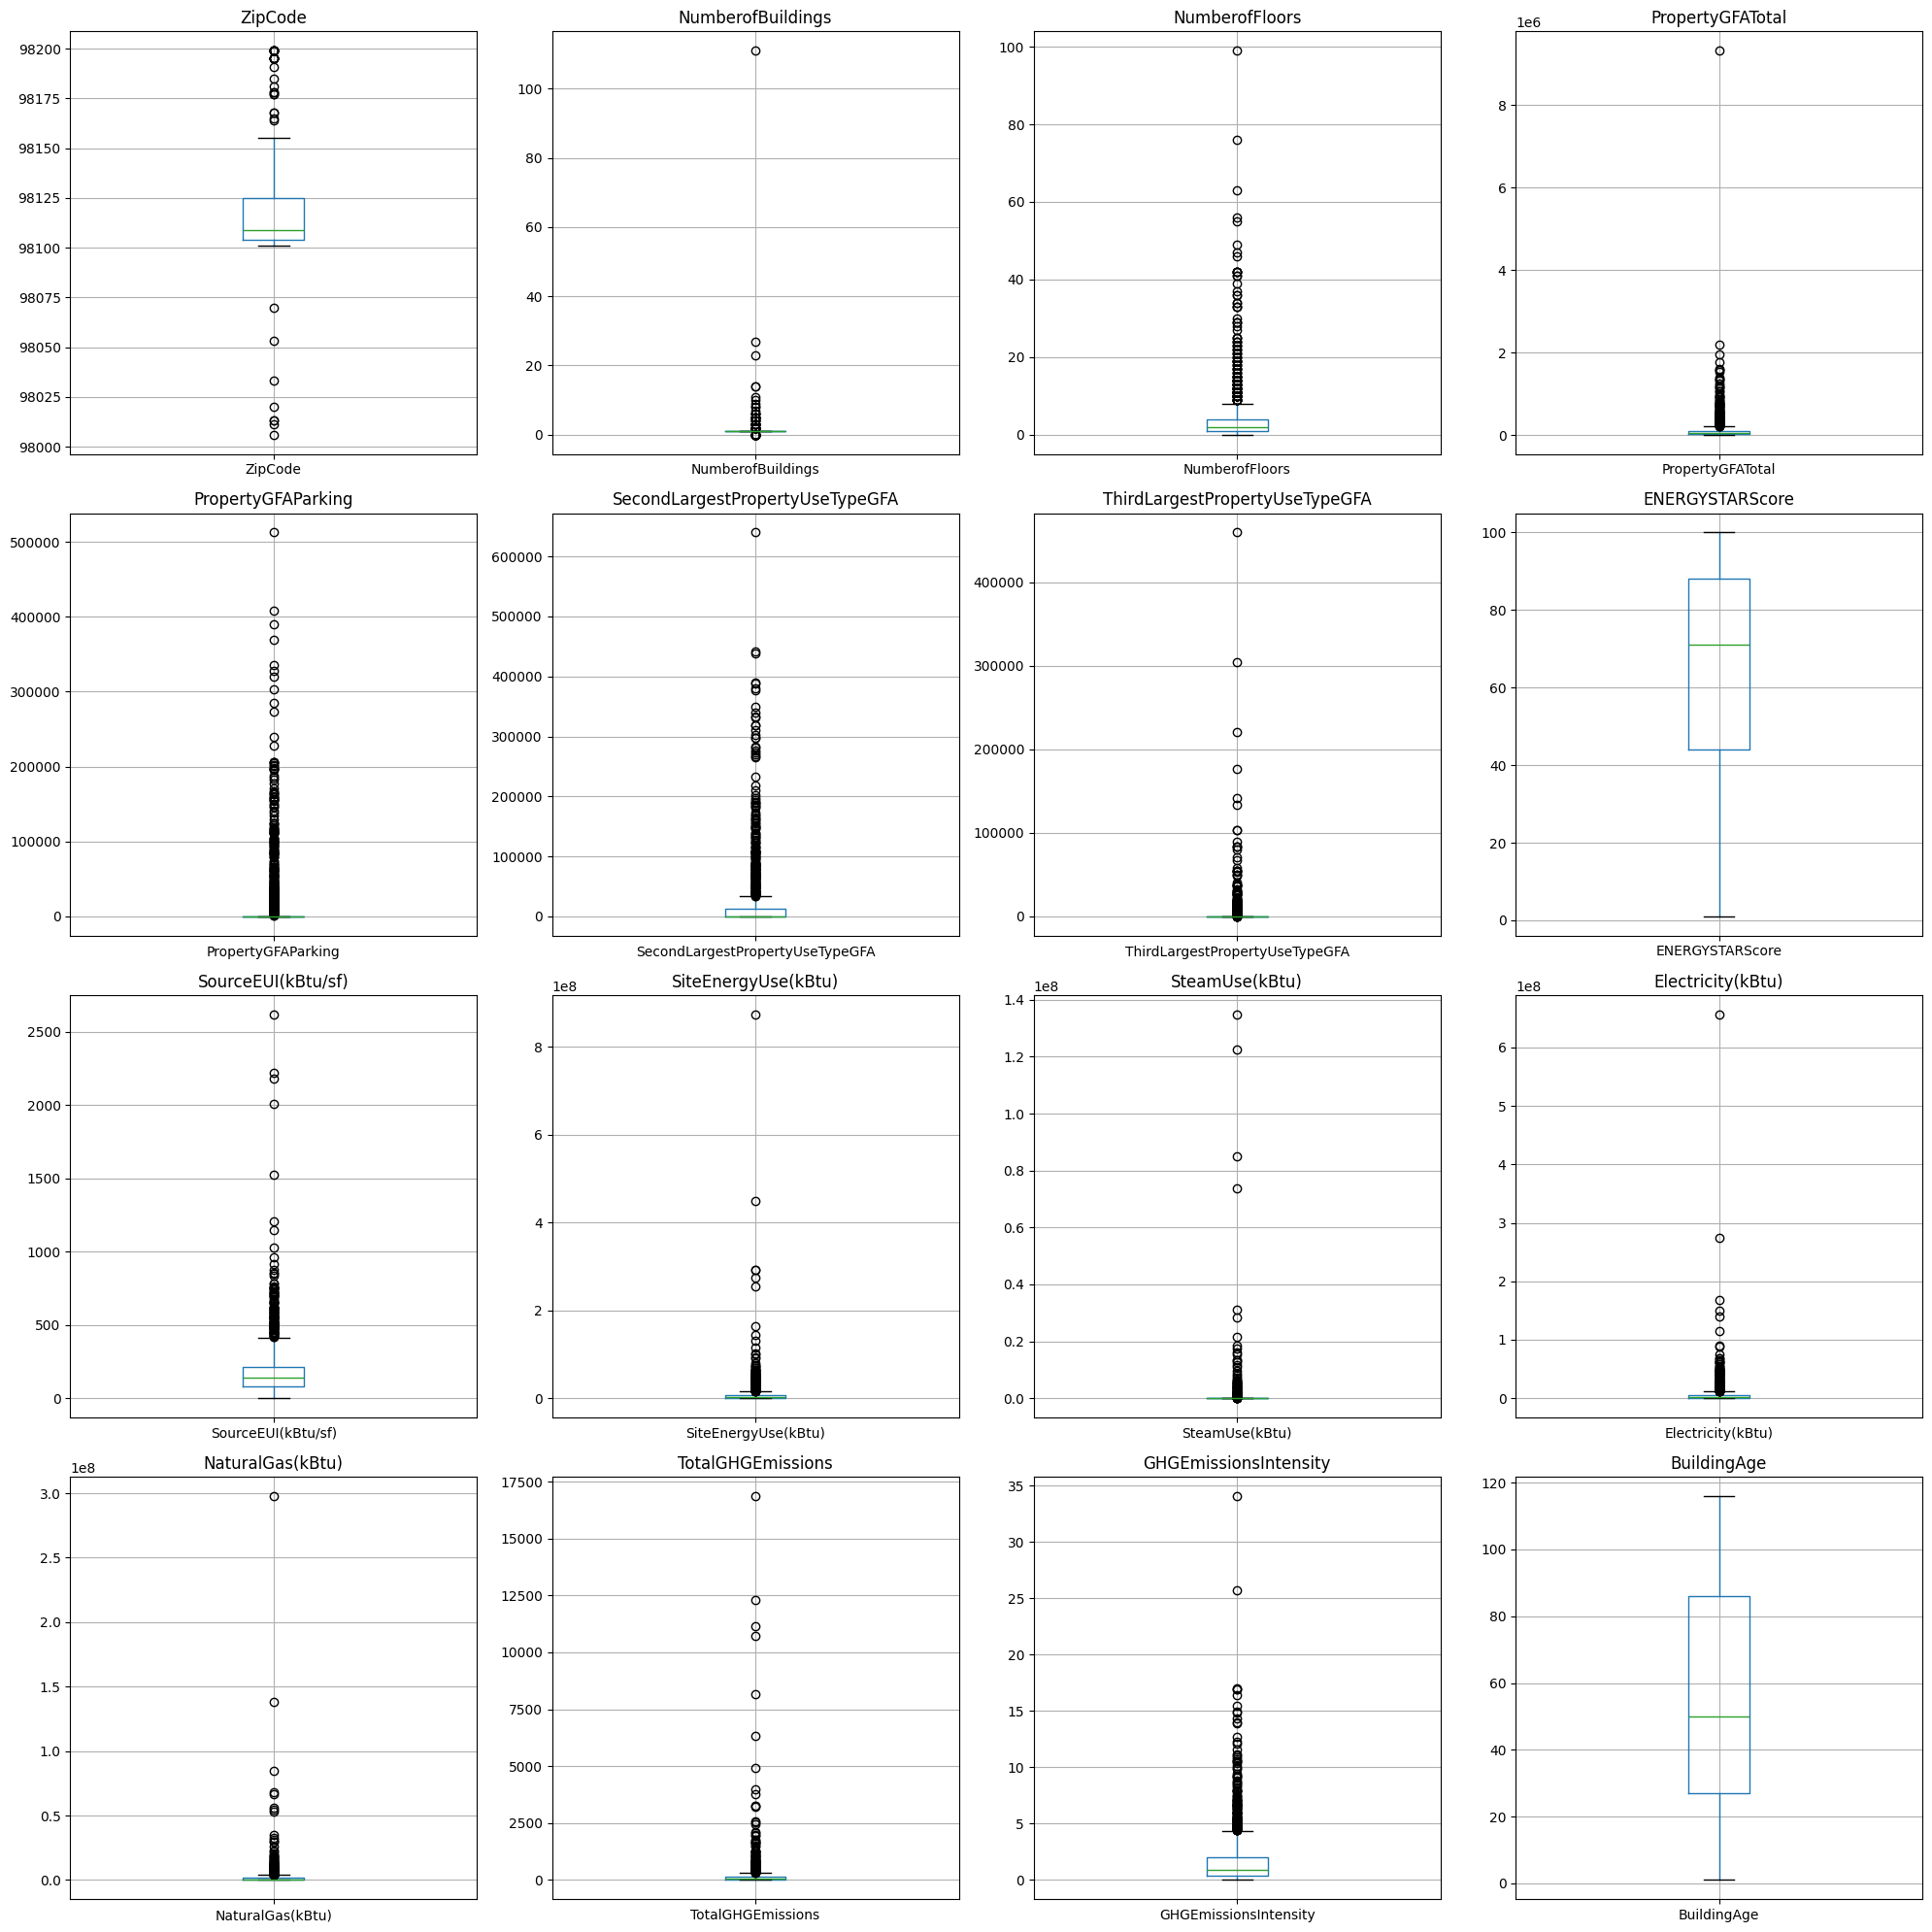

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Sélectionne les colonnes numériques
numerical_cols = df_final_2.select_dtypes(include=np.number).columns

# Calcule le nombre de lignes pour les subplots
num_rows = int(np.ceil(len(numerical_cols) / 4))

# Crée les figures et les axes
fig, axes = plt.subplots(num_rows, 4, figsize=(20, num_rows * 5))

# Parcourez les colonnes numériques et créez des boxplots
for i, col in enumerate(numerical_cols):
    row = i // 4
    col_num = i % 4
    ax = axes[row, col_num]
    df_final_2.boxplot(column=col, ax=ax)
    ax.set_title(col)

# Enlève les subplots vides si il y en a
if len(numerical_cols) % 4 != 0:
    for j in range(len(numerical_cols) % 4, 4):
        fig.delaxes(axes[num_rows - 1, j])

# Ajuster la mise en page et l'affichage
plt.tight_layout()
plt.show()

Il semble y avoir de nombreuses valeurs extrêmes au sein de notre jeu de données. Examinons de plus prêt les valeurs aberrantes pour chacune de nos variables numériques :

In [43]:
filtered_df = df_final_2[df_final_2['NumberofBuildings'] > 5]
display(filtered_df)

,BuildingType,PrimaryPropertyType,PropertyName,ZipCode,Neighborhood,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,LargestPropertyUseType,...,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,BuildingAge
105,Campus,University,SSCC MAIN CAMPUS,98106.0,DELRIDGE,27.0,2,441071,0,College/University,...,0.0,NaN,192.800003,3.830174e+07,0.0,25314575.0,12987166.0,866.23,1.96,46
124,NonResidential,Hospital,Seattle Children's Hospital Main Campus,98105.0,NORTHEAST,6.0,10,879000,0,Hospital (General Medical & Surgical),...,0.0,10.0,578.200012,2.538325e+08,0.0,115641210.0,138191238.0,8145.52,9.27,63
128,Campus,University,NSCC MAIN CAMPUS,98103.0,NORTHWEST,11.0,2,694072,111625,College/University,...,0.0,NaN,161.199997,3.589148e+07,0.0,33450832.0,2440648.0,362.82,0.52,46
162,Campus,Large Office,South Park,98108.0,GREATER DUWAMISH,14.0,2,334368,31874,Office,...,16766.0,NaN,451.200012,5.346668e+07,0.0,45321378.0,8145300.0,748.55,2.24,36
167,NonResidential,Hospital,Swedish Cherry Hill,98122.0,CENTRAL,6.0,5,597519,0,Hospital (General Medical & Surgical),...,0.0,34.0,454.399994,1.434230e+08,0.0,58754927.0,84668094.0,4906.33,8.21,26
170,NonResidential,Hospital,Harborview Medical Center,98104.0,EAST,9.0,8,1158691,0,Hospital (General Medical & Surgical),...,0.0,29.0,502.899994,2.930908e+08,122575032.0,168683602.0,1832129.0,10734.57,9.26,16
364,NonResidential,Other,Aurora Shopping Center,98133.0,NORTHWEST,6.0,1,111900,0,Strip Mall,...,0.0,NaN,190.500000,9.814820e+06,0.0,6390148.0,3424670.0,226.43,2.02,52
618,NonResidential,Hospital,Swedish First Hill,98122.0,EAST,7.0,14,1765970,0,Hospital (General Medical & Surgical),...,0.0,54.0,377.000000,2.916144e+08,134943456.0,139354828.0,17316120.0,12307.16,6.97,22
1672,NonResidential,Hospital,Main Hospital - All Wings,98133.0,NORTHWEST,8.0,1,415632,0,Hospital (General Medical & Surgical),...,0.0,85.0,400.200012,9.896078e+07,0.0,42864158.0,56096612.0,3278.11,7.89,50
1862,Campus,Other,FT C15 Fishermen's Center,98119.0,MAGNOLIA / QUEEN ANNE,23.0,1,260241,0,Other,...,0.0,NaN,353.200012,3.401298e+07,0.0,26894616.0,7118362.0,565.55,2.17,61


In [44]:
High_buildings = df_final_2[df_final_2['NumberofFloors']>=30]
High_buildings.loc[:,['BuildingType','NumberofFloors','PropertyName','PrimaryPropertyType']]

,BuildingType,NumberofFloors,PropertyName,PrimaryPropertyType
2,NonResidential,41,5673-The Westin Seattle,Hotel
13,NonResidential,33,Crowne Plaza Hotel Seattle,Hotel
49,NonResidential,34,Sheraton Seattle Hotel,Hotel
206,NonResidential,33,1600 Seventh,Large Office
214,NonResidential,36,1918 Eighth Avenue,Large Office
221,NonResidential,47,999 Third Avenue,Large Office
222,NonResidential,41,1000 Second Avenue,Large Office
227,NonResidential,34,1111 Third Avenue,Large Office
229,NonResidential,49,Safeco Plaza,Large Office
230,NonResidential,37,Fourth & Madison,Large Office


In [45]:
filtered_df = df_final_2[df_final_2['PropertyGFATotal'] > 1500000]
display(filtered_df)

,BuildingType,PrimaryPropertyType,PropertyName,ZipCode,Neighborhood,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,LargestPropertyUseType,...,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,BuildingAge
155,NonResidential,Other,CenturyLink,98134.0,GREATER DUWAMISH,1.0,6,1585960,327680,Other - Entertainment/Public Assembly,...,0.0,NaN,104.699997,59757440.0,0.000000e+00,49439914.0,10317518.0,892.63,0.56,17
273,NonResidential,Large Office,US Bank Centre,98101.0,DOWNTOWN,1.0,46,1536606,512608,Office,...,53116.0,89.0,157.300003,56606136.0,0.000000e+00,53668061.0,2938070.0,530.18,0.35,27
292,NonResidential,Large Office,Two Union Square,98101.0,DOWNTOWN,1.0,56,1605578,389860,Office,...,30744.0,97.0,110.300003,49517704.0,9.156549e+05,46081813.0,2520230.0,525.78,0.33,27
490,NonResidential,Large Office,Russell Investments Center,98101.0,DOWNTOWN,1.0,42,1592914,0,Office,...,303910.0,97.0,140.000000,56498868.0,9.864032e+05,55123924.0,388532.0,481.06,0.30,11
559,NonResidential,Large Office,Columbia Center - 2015,98104.0,DOWNTOWN,1.0,76,1952220,319400,Office,...,0.0,86.0,167.300003,92937640.0,0.000000e+00,87851862.0,5085763.0,882.56,0.45,31
618,NonResidential,Hospital,Swedish First Hill,98122.0,EAST,7.0,14,1765970,0,Hospital (General Medical & Surgical),...,0.0,54.0,377.000000,291614432.0,1.349435e+08,139354828.0,17316120.0,12307.16,6.97,22
1494,Campus,University,Entire Campus,98122.0,EAST,1.0,2,2200000,0,College/University,...,0.0,NaN,145.000000,114648520.0,0.000000e+00,61672821.0,52975694.0,3243.48,1.47,77
3274,Campus,University,University of Washington - Seattle Campus,98105.0,NORTHEAST,111.0,0,9320156,0,College/University,...,0.0,NaN,246.600006,873923712.0,8.498524e+07,657074389.0,0.0,11140.56,1.20,116


In [46]:
filtered_df = df_final_2[df_final_2['PropertyGFAParking'] > 200000]
display(filtered_df)

,BuildingType,PrimaryPropertyType,PropertyName,ZipCode,Neighborhood,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,LargestPropertyUseType,...,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,BuildingAge
43,NonResidential,Hotel,Seattle Hilton Hotel,98101.0,DOWNTOWN,1.0,24,332210,205970,Hotel,...,0.0,67.0,121.800003,16163194.0,0.000000e+00,12204406.0,3958787.0,295.33,0.89,47
77,NonResidential,Large Office,Bill and Melinda Gates Foundation,98109.0,MAGNOLIA / QUEEN ANNE,1.0,6,920598,303707,Office,...,6000.0,93.0,130.800003,36667044.0,0.000000e+00,27597261.0,9069780.0,674.09,0.73,6
155,NonResidential,Other,CenturyLink,98134.0,GREATER DUWAMISH,1.0,6,1585960,327680,Other - Entertainment/Public Assembly,...,0.0,NaN,104.699997,59757440.0,0.000000e+00,49439914.0,10317518.0,892.63,0.56,17
163,NonResidential,Other,Building 1,98125.0,NORTH,1.0,6,419848,335109,Parking,...,13567.0,NaN,285.700012,9134963.0,0.000000e+00,6995246.0,2139716.0,162.41,0.39,8
207,NonResidential,Large Office,1700 Seventh Ave,98101.0,DOWNTOWN,1.0,23,747747,205076,Office,...,9337.0,90.0,164.600006,30985420.0,0.000000e+00,27883939.0,3101477.0,359.11,0.48,16
212,NonResidential,Large Office,West 8th,98121.0,DOWNTOWN,1.0,25,758043,228668,Office,...,0.0,95.0,142.399994,27018020.0,0.000000e+00,26131643.0,886373.0,229.25,0.30,7
229,NonResidential,Large Office,Safeco Plaza,98154.0,DOWNTOWN,1.0,49,1123435,368980,Office,...,30329.0,89.0,149.000000,45163308.0,0.000000e+00,38378889.0,6784415.0,627.87,0.56,47
271,NonResidential,Large Office,1201 Third Avenue,98101.0,DOWNTOWN,1.0,55,1400000,285000,Office,...,133598.0,92.0,140.199997,53079164.0,2.179488e+06,49472833.0,1426840.0,588.90,0.42,28
273,NonResidential,Large Office,US Bank Centre,98101.0,DOWNTOWN,1.0,46,1536606,512608,Office,...,53116.0,89.0,157.300003,56606136.0,0.000000e+00,53668061.0,2938070.0,530.18,0.35,27
292,NonResidential,Large Office,Two Union Square,98101.0,DOWNTOWN,1.0,56,1605578,389860,Office,...,30744.0,97.0,110.300003,49517704.0,9.156549e+05,46081813.0,2520230.0,525.78,0.33,27


In [49]:
filtered_df = df_final_2[df_final_2['SecondLargestPropertyUseTypeGFA'] > 300000]
display(filtered_df.loc[:,['SecondLargestPropertyUseType','SecondLargestPropertyUseTypeGFA']])

,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA
35,Laboratory,639931.0
72,Parking,310699.0
166,Parking,438756.0
170,Parking,387651.0
205,Office,332343.0
273,Parking,377046.0
292,Parking,389860.0
302,Other,380639.0
488,Multifamily Housing,340236.0
490,Parking,348788.0


In [50]:
filtered_df = df_final_2[df_final_2['ThirdLargestPropertyUseTypeGFA'] > 100000]
display(filtered_df.loc[:,['ThirdLargestPropertyUseType','ThirdLargestPropertyUseTypeGFA']])

,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA
35,Non-Refrigerated Warehouse,459748.0
230,Financial Office,103478.0
271,Other,133598.0
301,Retail Store,103200.0
477,Non-Refrigerated Warehouse,220303.0
490,Financial Office,303910.0
2314,Parking,141450.0
2530,Parking,177210.0


Toutes les valeurs extrêmes ne semblent pas être des anomalies, néanmoins au vu de leurs nombres très faibles au sein du jeu de données, il faudra sûrement les enlever afin de ne pas fausser notre algorithme.

Nous pouvons enfin exporter notre jeu de données, sous le nom du fichier "df_refined".

In [ ]:
df_final_2.to_csv('/content/drive/MyDrive/Projet 4 : Anticiper les besoins en consommation pour les bâtiments/df_refined.csv', index=False)